In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector as ctr
import numpy as np

In [9]:
db =ctr.connect(host="localhost",
                username="root",
                password="Wogzyn@group321",
                database = "ecommerce")
cur =db.cursor()


1. List all unique cities where customers are located.


In [71]:
query1 = "select distinct(customer_city) from customers"
cur.execute(query1)
data = cur.fetchall()

df =pd.DataFrame(data, columns = ["Customer_city"])
df

,Customer_city
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


2. Count the number of orders placed in 2017.


In [73]:
query1 = "select count(order_id) from orders where order_purchase_timestamp = 2017"
cur.execute(query1)
data = cur.fetchall()
print("The total Number of orders placed in 2017 are : ",data[0][0])

The total Number of orders placed in 2017 are :  45101


3. Find the total sales per category.


In [74]:
query1 = """select products.product_category ,round(sum(payments.payment_value),0) from order_items 
join products on order_items.product_id = products.product_id 
join payments on 
order_items.order_id = payments.order_id group by products.product_category"""
cur.execute(query1)
data = cur.fetchall()

df =pd.DataFrame(data ,columns=["Product_Category","Total_Sales"])
df

,Product_Category,Total_Sales
0,perfumery,506739.0
1,Furniture Decoration,1430176.0
2,telephony,486882.0
3,Fashion Bags and Accessories,218158.0
4,bed table bath,1712554.0
...,...,...
69,cds music dvds,1199.0
70,La Cuisine,2914.0
71,Fashion Children's Clothing,786.0
72,PC Gamer,2174.0


4. Calculate the percentage of orders that were paid in installments.


In [75]:
query1 = """select (Sum(case when payment_installments>=1 then 1 else 0 end)/count(*))*100 from payments
"""
cur.execute(query1)
data = cur.fetchall()
print("Percentage of orders that are placed in installments is :",data[0][0])

Percentage of orders that are placed in installments is : 99.9981


5. Count the number of customers from each state. 


                Product_Category  Total_Sales
0                      perfumery     506739.0
1           Furniture Decoration    1430176.0
2                      telephony     486882.0
3   Fashion Bags and Accessories     218158.0
4                 bed table bath    1712554.0
..                           ...          ...
69                cds music dvds       1199.0
70                    La Cuisine       2914.0
71   Fashion Children's Clothing        786.0
72                      PC Gamer       2174.0
73        insurance and services        325.0

[74 rows x 2 columns]


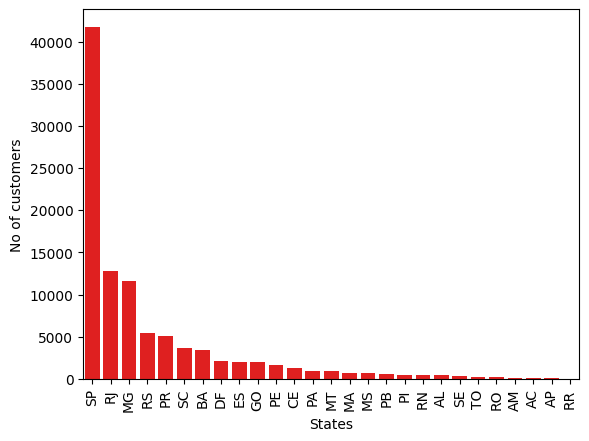

In [76]:
query1 = """select customer_state ,count(customer_id) from customers
group by customer_state;  
"""
cur.execute(query1)
data = cur.fetchall()
print(df)
df = pd.DataFrame(data,columns = ["States","No of customers"])
df =df.sort_values(by = "No of customers",ascending=False)
sns.barplot(data=df,y="No of customers",x="States",color="Red")
plt.xticks(rotation=90)
plt.show()

6. Calculate the number of orders per month in 2018.   (Intermediate)

      Months  Orders
0      April    6939
1     August    6512
2   February    6728
3    January    7269
4       July    6292
5       June    6167
6      March    7211
7        May    6873
8    October       4
9  September      16


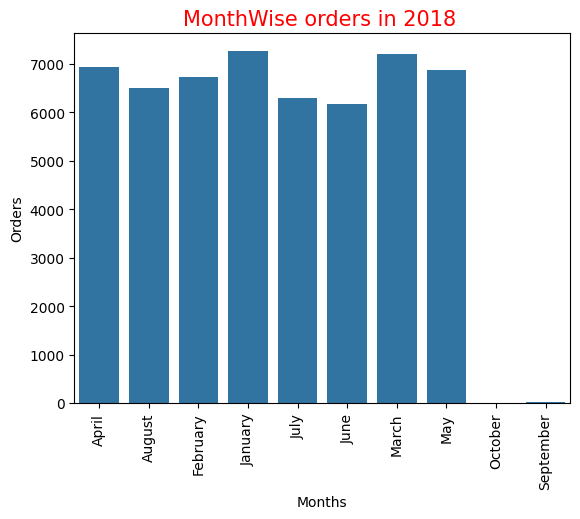

<Figure size 10x100 with 0 Axes>

In [15]:
query1 = """select monthname(order_purchase_timestamp) as Month ,count(order_id) from orders
where year(order_purchase_timestamp) = 2018
group by monthname(order_purchase_timestamp)
order by monthname(order_purchase_timestamp)
  
"""
cur.execute(query1)
data = cur.fetchall()

df = pd.DataFrame(data,columns=["Months","Orders"])
print(df)                                

sns.barplot(data=df,x="Months",y="Orders")
plt.xticks(rotation=90)
plt.title("MonthWise orders in 2018 ",fontsize=15,color="red")
plt.figure(figsize=[0.1,1])
plt.show()

7. Find the average number of products per order, grouped by customer city.

In [77]:
query1 = """select customers.customer_city, round(avg(cte.orders),2) as avg_orders from
(select orders.order_id,orders.customer_id,count(order_items.order_id) as orders from orders
join order_items
on orders.order_id=order_items.order_id
group by orders.order_id,orders.customer_id) as cte
join customers
on cte.customer_id=customers.customer_id
group by customers.customer_city order by avg_orders desc;
  
"""
cur.execute(query1)
data = cur.fetchall()

df = pd.DataFrame(data,columns=["City","Avg_Product/Order"])
df

,City,Avg_Product/Order
0,padre carvalho,7.00
1,celso ramos,6.50
2,candido godoi,6.00
3,datas,6.00
4,matias olimpio,5.00
...,...,...
4105,sebastiao leal,1.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


8. Calculate the percentage of total revenue contributed by each product category.

In [78]:
 query1 = """select upper(products.product_category),
round((sum(payments.payment_value)/(select sum(payment_value) from payments)*100),2)
as revenue_percentage from payments
join order_items
on payments.order_id=order_items.order_id
join products
on products.product_id=order_items.product_id
group by products.product_category
order by revenue_percentage desc;
  
"""
cur.execute(query1)
data = cur.fetchall()

df = pd.DataFrame(data,columns=["Product_Category","Sales %"])
df

,Product_Category,Sales %
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


9. Identify the correlation between product price and the number of times a product has been purchased.

In [21]:
query = """select products.product_category , count(order_items.product_id) as items_purchased,round(avg(order_items.price),2) as avg_price from products
join order_items
on products.product_id=order_items.product_id
group by products.product_category;"""

cur.execute(query)
data = cur.fetchall()

dt = pd.DataFrame(data,columns = ["Category","orders","price"])
arr1 = dt["orders"]
arr2 = dt["price"]

a = np.corrcoef([arr1,arr2])
print("The Correlation between no of orders purchased and price is :",a[0][1])

The Correlation between no of orders purchased and price is : -0.10631514167157562


10. Calculate the total revenue generated by each seller, and rank them by revenue.

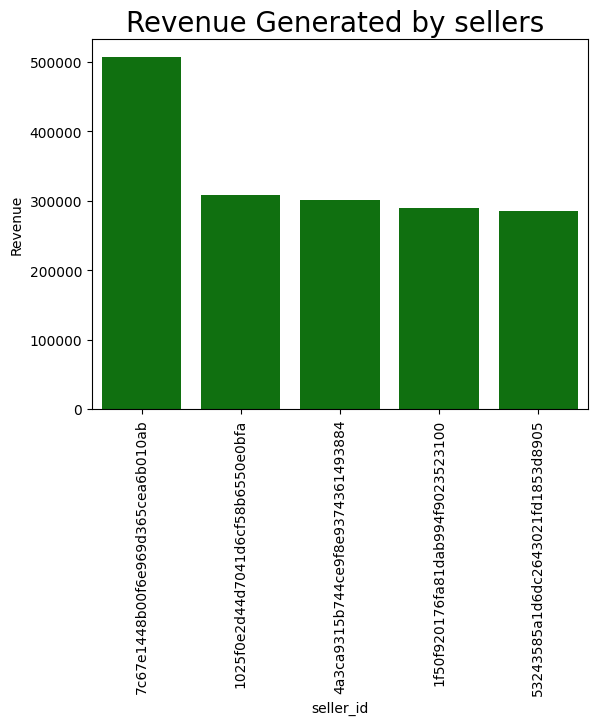

In [83]:
query = """ 
select * , dense_rank() over(order by revenue desc) as rnk from
(select order_items.seller_id, round(sum(payments.payment_value),2)as revenue  from order_items
join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a;"""

cur.execute(query)
data = cur.fetchall()
dt = pd.DataFrame(data,columns=["seller_id","Revenue","Rank"])
dt2 =dt.head()
sns.barplot(data=dt2 ,x = "seller_id",y = "Revenue",color ="green")
plt.title("Revenue Generated by sellers ", fontsize=20)
plt.xticks(rotation=90)
plt.show()

11. Calculate the moving average of order values for each customer over their order history.

In [84]:
query = """ select customer_id,order_purchase_timestamp ,avg(payment) over(partition by customer_id order by order_purchase_timestamp
 rows between 2 preceding  and current row) as moving_avg
from
(select orders.customer_id,orders.order_purchase_timestamp,payments.payment_value as payment from orders
join payments
on orders.order_id=payments.order_id) as a;
"""

cur.execute(query)
data = cur.fetchall()
dt = pd.DataFrame(data,columns=["Customer_id","ordre_purchase_timestamp","Moving_Avg"])
dt

,Customer_id,ordre_purchase_timestamp,Moving_Avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.010002
...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.500000


12. Calculate the cumulative sales per month for each year.

In [51]:
query = """ select yearr,monthh, round(sum(sales) over (partition by yearr order by monthh asc),2) as total_sales from
(select year(orders.order_purchase_timestamp) as yearr,month(orders.order_purchase_timestamp)as monthh,
sum(payments.payment_value) as sales from orders
join payments
on orders.order_id = payments.order_id
group by year(order_purchase_timestamp),month(order_purchase_timestamp)
order by year(order_purchase_timestamp),month(order_purchase_timestamp) asc) as a;"""

cur.execute(query)
data = cur.fetchall()
dt = pd.DataFrame(data,columns=["Year","Month","Cumulative_sales"])
dt

,Year,Month,Cumulative_sales
0,2016,9,252.24
1,2016,10,59342.72
2,2016,12,59362.34
3,2017,1,138488.04
4,2017,2,430396.05
5,2017,3,880259.65
6,2017,4,1298047.68
7,2017,5,1890966.50
8,2017,6,2402242.88
9,2017,7,2994625.80


13. Calculate the year-over-year growth rate of total sales.
 

In [87]:
query = """with a as(select year(orders.order_purchase_timestamp) as years , round(sum(payments.payment_value),2)  as sales from orders
join payments
on orders.order_id = payments.order_id
group by years order by years asc)

select years, round((sales-lag(sales,1) over(order by years))/lag(sales) over(order by years)*100,2) from a"""

cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data, columns = ["Year","growth_rate"])
df

,Year,growth_rate
0,2016,NaN
1,2017,12112.7
2,2018,20.0


14. the top 3 customers who spent the most money in each year

   Year                       customer_id      Payments  Rank
0  2016  a9dc96b027d1252bbac0a9b72d837fc6   1423.550049     1
1  2016  1d34ed25963d5aae4cf3d7f3a4cda173   1400.739990     2
2  2016  4a06381959b6670756de02e07b83815f   1227.780029     3
3  2017  1617b1357756262bfa56ab541c47bc16  13664.080078     1
4  2017  c6e2731c5b391845f6800c97401a43a9   6929.310059     2
5  2017  3fd6777bbce08a352fddd04e4a7cc8f6   6726.660156     3
6  2018  ec5b2ba62e574342386871631fafd3fc   7274.879883     1
7  2018  f48d464a0baaea338cb25f816991ab1f   6922.209961     2
8  2018  e0a2412720e9ea4f26c1ac985f6a7358   4809.439941     3


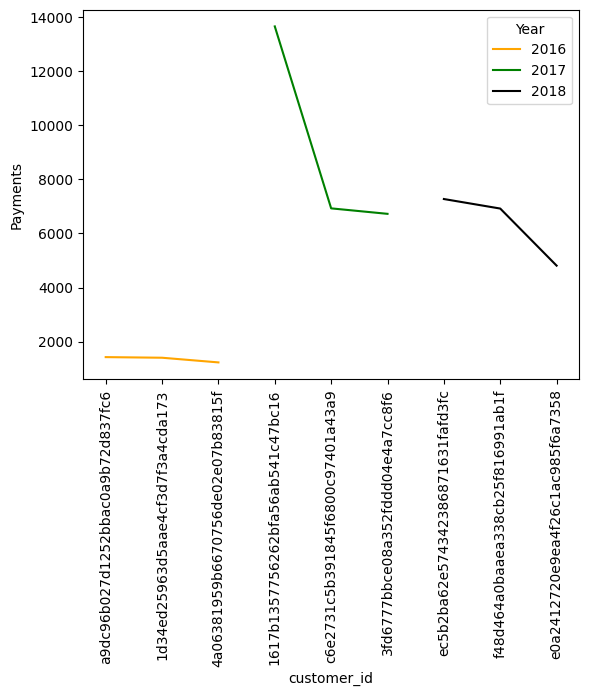

In [94]:
query = """ with n as (select  year(orders.order_purchase_timestamp) as years ,orders.customer_id ,sum(payments.payment_value) as payments ,
dense_rank() over (partition by  year(orders.order_purchase_timestamp) order by  sum(payments.payment_value) desc) as rankk
from orders
join payments
on orders.order_id = payments.order_id
group by years,orders.customer_id)
select * from n where rankk <=3;
"""


cur.execute(query)
data =cur.fetchall()
df = pd.DataFrame(data, columns = ["Year","customer_id","Payments","Rank"])
print(df)
dd =["orange","green","black"]
sns.lineplot(data=df ,x="customer_id",y="Payments",hue="Year",palette=dd)
plt.xticks(rotation=90)
plt.show()